In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats

#define corr

df=pd.read_csv('/content/drive/MyDrive/exam_sample_cor.csv')


#sns.lmplot(x='science',y='math',data=df)

#in_reg=sm.OLS.from_fomula("math~science",df).fit()               #종 수학 독 과학

#로지스틱은 연속과 범주형
#summary()

passtest=[0.01,0.01,0.01,0.01,0.01,1,1,1,1,1]
#0.0.1?

score=[51,64,60,50,68,80,90,92,99,83]

#df=pd.DataFrame({"passtest":passtest,"score":score})
#df.head()

#상관분석
sns.lmplot(x='score',y='passtest',data=df,logistic=True)

#시그모이드는 연속과연속

def sigmoid(x):
  return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y1=sigmoid(x*0.5)
y2=sigmoid(x)
y3=sigmoid(x*2)

plt.plot(x,y1,'r',linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b')




plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()
#가장 에러가 적은 함수를 적용하여야 한다. 스케터로 뿌려보고 분석을 한다.,




In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


n_output=784# 28*28
n_noise=128#렌덤 노이즈 벡터크기

generator=Sequential()



generator = Sequential()
generator.add(Dense(units=256, input_dim=n_noise, activation='relu'))
generator.add(Dense(units=512, activation='relu'))
# tanh 활성화 함수 사용하여 -1~1사이로 픽셀값 통일
generator.add(Dense(units=n_output, activation='tanh'))




discriminator = Sequential()
discriminator.add(Dense(256, input_dim=n_output, activation='relu'))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))

g_input=Input(shape=(n_noise,))
g_output=discriminator(generator(g_input))
gan=Model(g_input,g_output)

discriminator.trainable = True#학습이 같이 되면 안되므로 디스크리미네이터 따로 학습
adam = tf.optimizers.Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=adam)
  
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=adam)
#gan모델 학습 제너레이터 학습부분?   



gan.summary()

n_epoch=100
batch_size=128
saving_interval=10


(train_images,_),(_,_)=mnist.load_data()

buffer_size=len(train_images)#60000  개수 
train_images=train_images.reshape((buffer_size,n_output))#28*28

train_images=(train_images-127.5)/127.5 #-1~1로 맞춰서 정규화(함수때문)



train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)#배치 사이즈 만큼 자른 후 섞어줌 오버피팅 방지



for i in range(n_epoch):
  print('Epoch Num : {}/{}'.format((i + 1), n_epoch))









for image_batch in train_dataset:
  n_bt_imgs=len(image_batch)# 미니배치별 가중치 갱신 현재비치 크기만큼 진짜 가짜 레이블 배열 생성
  true_labels=np.ones((n_bt_imgs,1))
  fake_labels=np.ones((n_bt_imgs,1))


  d_loss_real=discriminator.train_on_batch(image_batch,true_labels)# loss 학습 진짜 이미지에 대한 판별 모델 가중치 갱신 및 오차 계산
  noise=np.random.normal(0,1,(n_bt_imgs,n_noise))
  gen_imgs=generator.predict(noise)
  d_loss_fake=discriminator.train_on_batch(gen_imgs,fake_labels)#노이즈를 제너레이터에 넣고 만든 이미지로 판별모델 가중치 갱신
  d_loss=0.5*np.add(d_loss_real,d_loss_fake)


  g_loss=gan.train_on_batch(noise,true_labels)#제너레이터는 트루 라벨이 목적이므로..제널이터 학습 갠 컴파일 부분에 간다?


  if (i + 1) % saving_interval == 0 or i == 0:
    print('Epoch:%d' % (i + 1), 'd_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

    noise = np.random.normal(0, 1, (25, n_noise)) # 25개의 노이즈 벡터 생성
    gen_imgs = generator.predict(noise) # 생성자를 이용한 25개의 이미지 생성
# 이미지 픽셀값 0~1로 조정
    gen_imgs = 0.5 * gen_imgs + 0.5
# 생성된 이미지 출력 및 저장
    fig, axs = plt.subplots(5, 5) # 5×5 subplot에 25개 이미지 출력
    count = 0
  for j in range(5):
    for k in range(5):
      axs[j, k].imshow(np.reshape(gen_imgs[count], (28, 28)))
      axs[j, k].axis('off')
      count += 1
  plt.show()





# 검증 데이터셋의 로스가 오를때  학습중지 -발리데이션 설정




In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pylab as plt
from keras.layers import BatchNormalization, Dropout

(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truk']
#이미지 불러온 후 리스트 구현하여 각 대응점 구축


plt.figure(figsize=(6,1))
for i in range(36):
  plt.subplot(3,12,i+1)
  plt.imshow(train_images[i],cmap='brg')
  plt.axis('off')

plt.show()
#이미지 불러오기

train_images=train_images.reshape((50000,32,32,3))
test_images=test_images.reshape((10000,32,32,3))
train_images,test_images=train_images/255.0,test_images/255.0
# 훈련 데이터 50000개의 32*32 3채널 이미지로 변환 테스트데이터도 역시 10000개로 reshape 그리고 픽셀최대값 255로나눠서 정규화




#model.add(BatchNormalization())


# 모델 작성
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='valid',
                                 strides=(1,1), input_shape=(32,32,3)))
#처음 컨볼루션시 넣어지는 값의 shape값으로 인풋인자를 항상 부여한다. 패딩은 안하고 스트라이드는 1,1

#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))
#배치정규화를 하거나 맥스풀링을 하거나 드랍아웃을 할 지는 주석처리를 통해 쉽게 결정한다.활성화함수는 'relu'로 고정 

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Flatten())
#벡터화

model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#여기서는 스파즈가 사용되었지만 원래는 그냥 카테고리컬이 사용되므로 유의할 것 !

# 컴파일 실행 
model.summary()
#요약
history=model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)
#학습시작

plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()
print('최적화 완료!')
#맷플롭립 활용 오차 정확도 시각화

print('test results==============================')

labels=model.predict(test_images)
# 정확도 출력용 코드
print('\n Accuracy:%.4f'%(model.evaluate(test_images,test_labels,verbose=2)[1]))

fig=plt.figure()

for i in range(15):
  subplot=fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s'%class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32,32,3)),cmap=plt.cm.brg)
#이미지 15개나열용 코드
plt.show()

print('============================================================@@')



#사이파 10 관련 코드

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pylab as plt
from keras.layers import BatchNormalization, Dropout


# cnn 작성후 LSTM학습시 더 좋은 성능을 얻는다.


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


train_images = train_images.reshape((50000,32,32,3))
test_images = test_images.reshape((10000,32,32,3))
train_images, test_images = train_images / 255.0 


one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))

model.add(Reshape(target_shape = (16,13*13)))
# 마지막 계층을 변화
model.add(LSTM(30, input_shape = (16,13*13), return_sequences = Fal
se))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy'
, metrics=['accuracy'])

model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=5, b
atch_size=32)
print("\n=============test results==========")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,
one_hot_test_labels)[1]
))
print("===================================")
#return_sequences= True, Flatten() 이용하여 수정해 보자

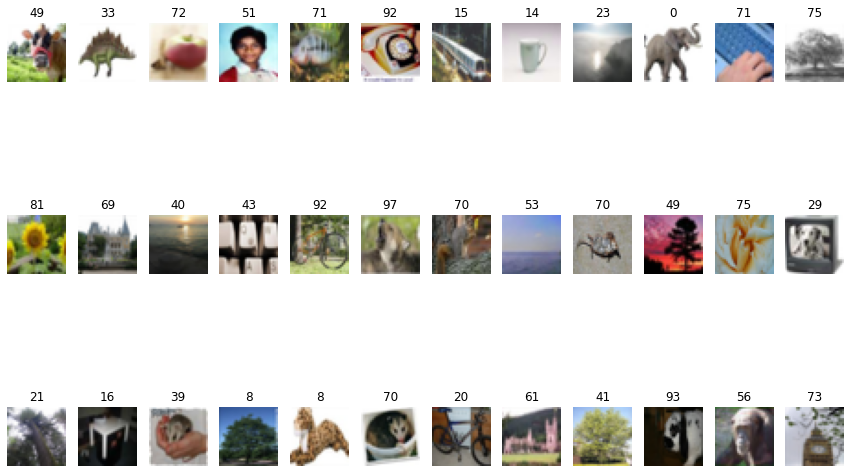

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 31, 31, 32)        416       
                                                                 
 batch_normalization_48 (Bat  (None, 31, 31, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_49 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                     

RuntimeError: ignored

In [59]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers 
import matplotlib.pylab as plt
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.datasets.cifar100 import load_data
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = load_data()

train_images = train_images.reshape((50000,32,32,3))
test_images = test_images.reshape((10000,32,32,3))



one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)




fig = plt.figure(figsize=(15,10))

for i in range(36):
  subplot = fig.add_subplot(3,12,i+1)
  
  subplot.set_title('%d' % np.argmax(one_hot_test_labels[i]))
  plt.imshow(train_images[i],cmap='brg')
  plt.axis('off')

plt.show()










model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.summary()

print("\n=============test results==========")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,one_hot_test_labels)[1]
))


model.add(tf.keras.layers.Reshape(target_shape = (3, 10,10) ))
# 마지막 계층을 변화
model.add(tf.keras.layers.LSTM(16, input_shape = (3, 10, 10) ), return_sequences = True)
model.add(tf.keras.layers.Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(750, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='softmax'))


model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
loss='sparse_categorical_crossentropy'
, metrics=['accuracy'])

for i in range(15):
  subplot=fig.add_subplot(3,5,i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s'%class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32,32,3)),cmap=plt.cm.brg)
#이미지 15개나열용 코드
plt.show()




model.summary()

history=model.fit(train_images,train_labels,epochs=5,batch_size=10)

print("\n=============test results==========")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,
one_hot_test_labels)[1]
))
print("===================================")
#return_sequences= True, Flatten() 이용하여 수정해 보자




























